In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("netflix_titles.csv")

In [7]:
data.head()
data.info()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['rating'].fillna('Unrated', inplace=True)
data['duration'].fillna('Unknown', inplace=True)

<ipython-input-8-67c5686dfad1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace=True)
<ipython-input-8-67c5686dfad1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [9]:
data[['duration_value', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce').fillna('Unknown')
data.drop_duplicates(inplace=True)
data['duration_value'].fillna('Unknown', inplace=True)
data['duration_unit'].fillna('Unknown', inplace=True)


<ipython-input-9-cca77a8ffedf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration_value'].fillna('Unknown', inplace=True)
<ipython-input-9-cca77a8ffedf>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['duration_value'].fillna('Unknown', inplace=True)
<ipython-input-9-cca77a8ffedf>:6: FutureWarning: A value is trying to be set on

In [10]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8807 non-null   object
 1   type            8807 non-null   object
 2   title           8807 non-null   object
 3   director        8807 non-null   object
 4   cast            8807 non-null   object
 5   country         8807 non-null   object
 6   date_added      8807 non-null   object
 7   release_year    8807 non-null   int64 
 8   rating          8807 non-null   object
 9   duration        8807 non-null   object
 10  listed_in       8807 non-null   object
 11  description     8807 non-null   object
 12  duration_value  8807 non-null   object
 13  duration_unit   8807 non-null   object
dtypes: int64(1), object(13)
memory usage: 963.4+ KB


**`Proportion of Movies VS TV show Content on Netflix`**

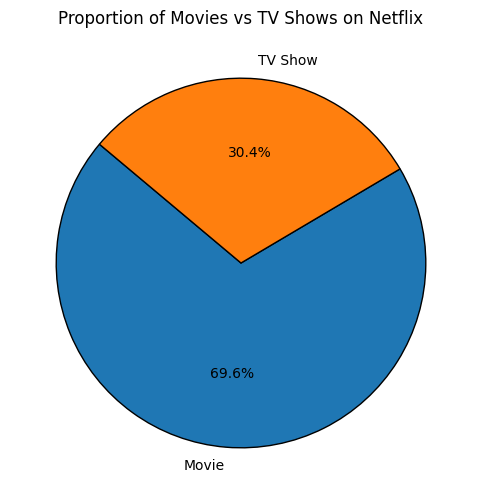

,proportion
type,
Movie,69.615079
TV Show,30.384921


In [11]:
import matplotlib.pyplot as plt

# Calculate the proportion of content types (Movies vs TV Shows)
content_type_counts = data['type'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
content_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=content_type_counts.index, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Movies vs TV Shows on Netflix')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.show()

# Display the numerical distribution for reference
content_type_counts


**`Proportion of Movies VS TV show Content on Netflix`in terms of numbers**

In [12]:
# Calculate the counts of Movies and TV Shows
content_type_counts_absolute = data['type'].value_counts()

content_type_counts_absolute


,count
type,
Movie,6131
TV Show,2676


**highest number of content releases in a Year**

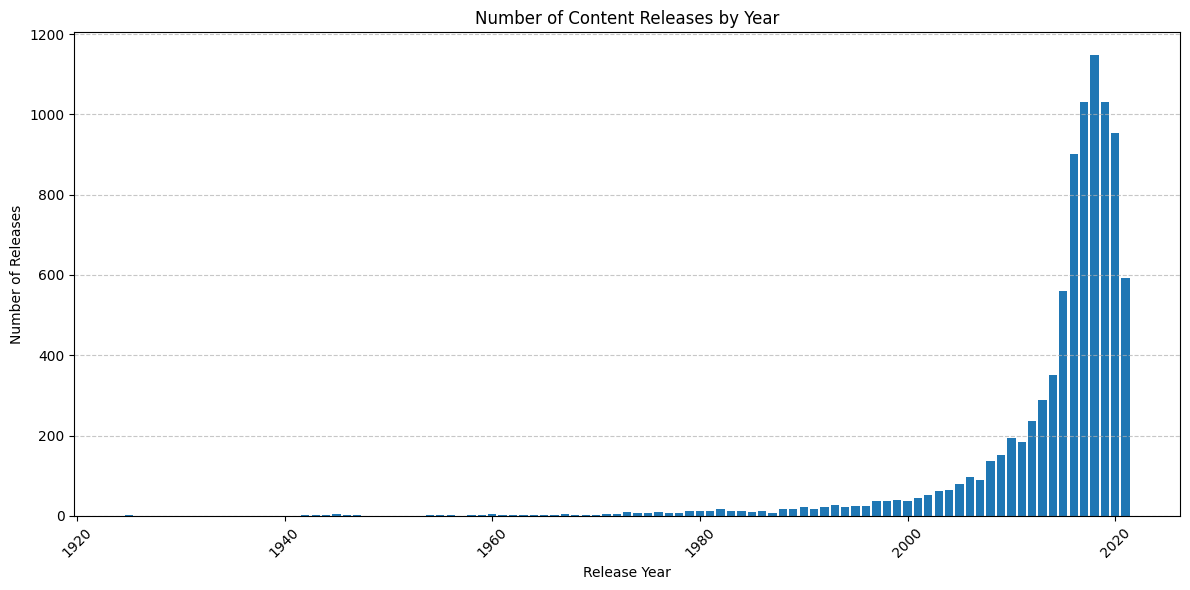

,count
release_year,
2018,1147


In [13]:
# Analyze the release years with the highest number of content releases
release_year_counts =  data['release_year'].value_counts().sort_index()

# Plot the release years with content counts
plt.figure(figsize=(12, 6))
plt.bar(release_year_counts.index, release_year_counts.values)
plt.title('Number of Content Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify the years with the highest number of releases
most_popular_years = release_year_counts[release_year_counts == release_year_counts.max()]

most_popular_years


1. Content Type by Year


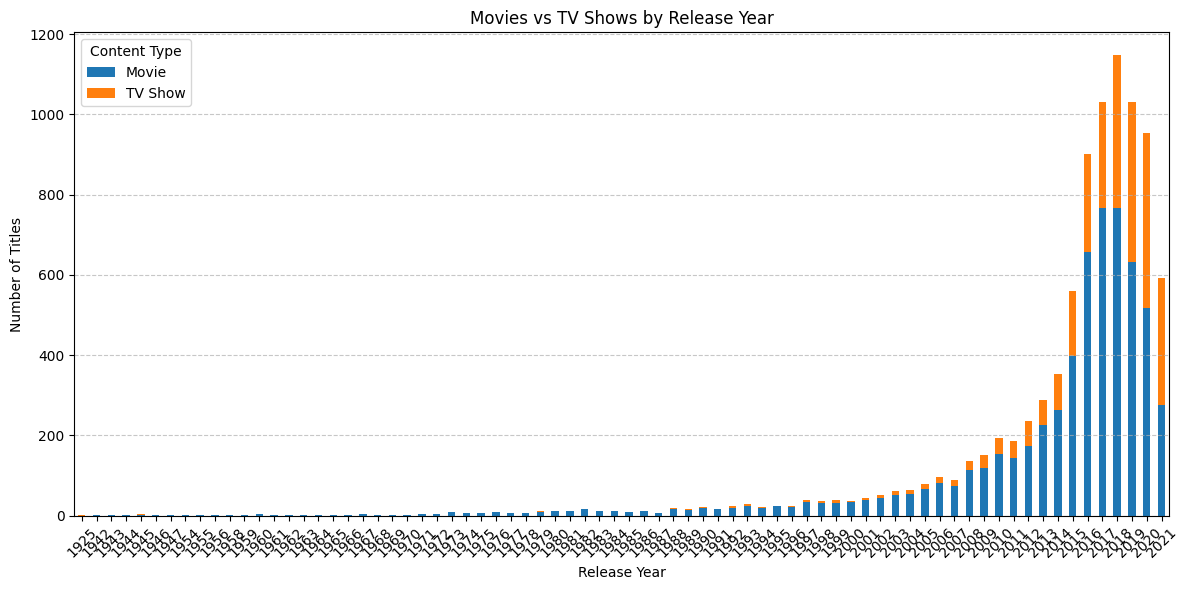

In [14]:
# Breakdown of Movies vs TV Shows by release year
content_type_by_year = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot
content_type_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Movies vs TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Genre Trends**

Most Commonly represnted Genres

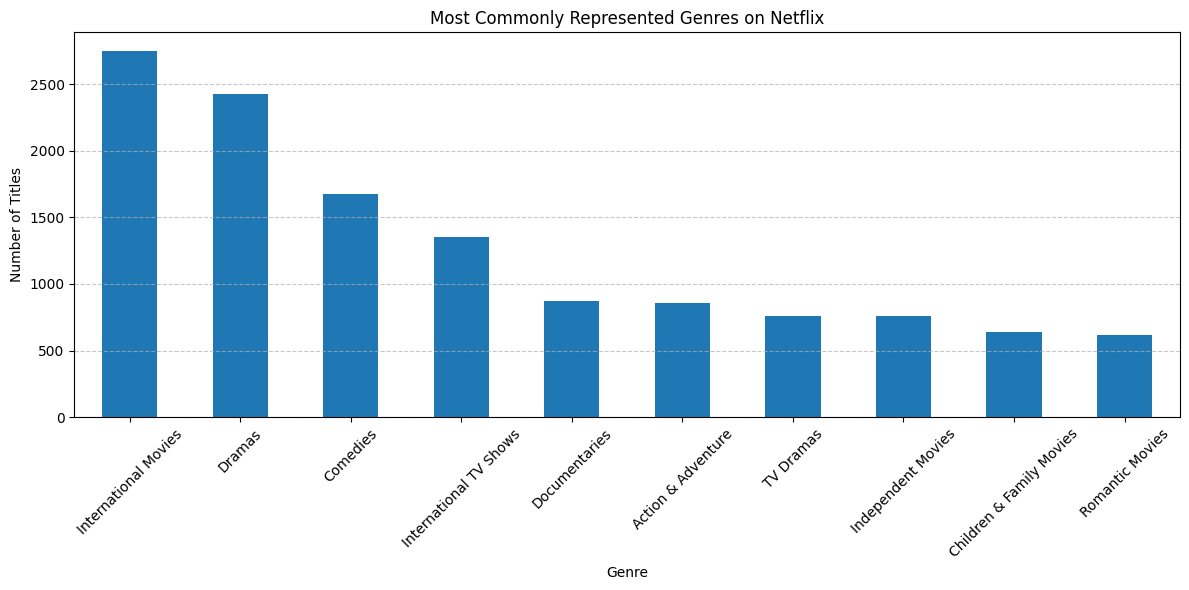

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


In [15]:
# Analyze most commonly represented genres
# Split the 'listed_in' column into individual genres and count their occurrences
genre_counts = data['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plot the most common genres
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Most Commonly Represented Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

genre_counts.head(10)


**Director Insights**

Director with highest featured works on Netflix

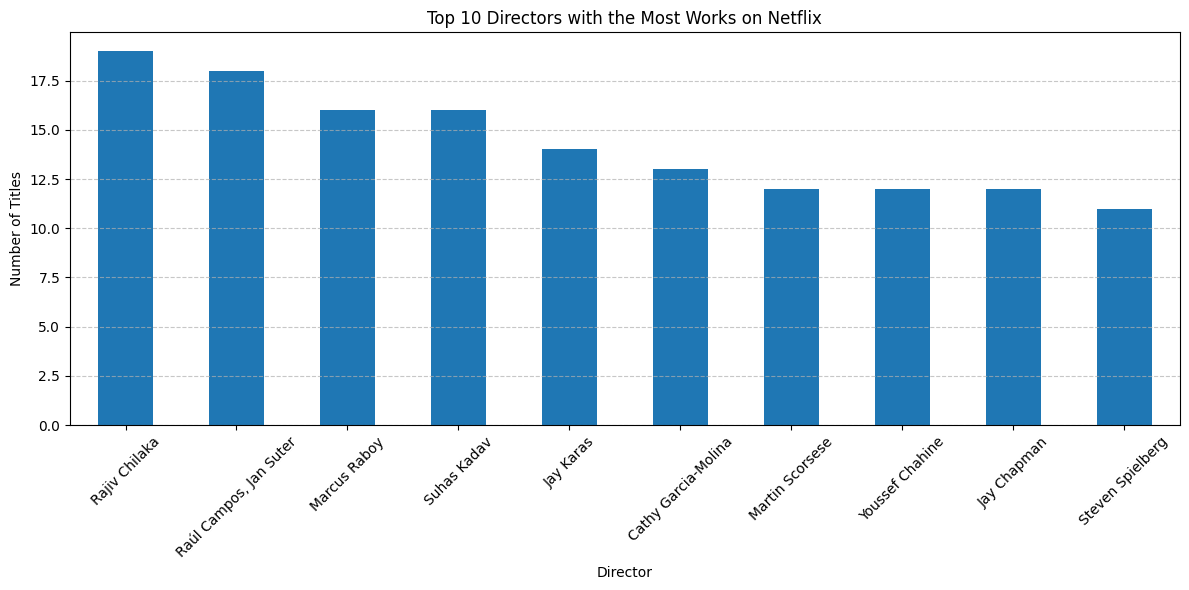

In [20]:
# Filter out entries with 'Unknown' as the director
directors_data = data[data['director'] != 'Unknown']

# Count the number of works for each director
director_counts = directors_data['director'].value_counts()

# Director with the most featured works
top_director = director_counts.head(10)

top_director

plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='bar')
plt.title('Top 10 Directors with the Most Works on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Regional Preferences**

1. Analysis of content ditribution across different countries

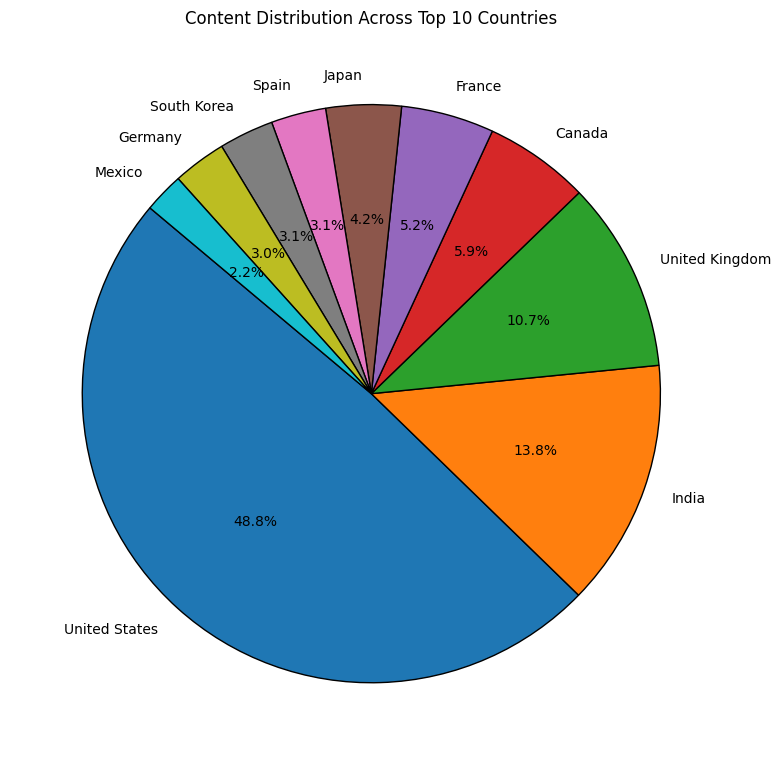

,count
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


In [21]:
# Filter out entries with 'Unknown' in the country column
country_data = data[data['country'] != 'Unknown']

# Count the number of titles for each country
country_counts = country_data['country'].str.split(',').explode().str.strip().value_counts()

# Focus on the top 10 countries with the most content
top_countries = country_counts.head(10)

# Plot a pie chart for content distribution across the top 10 countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Content Distribution Across Top 10 Countries')
plt.tight_layout()
plt.show()

# Display the numerical data for reference
top_countries



2. Genre wise Genre Distribution and Rating Distribution

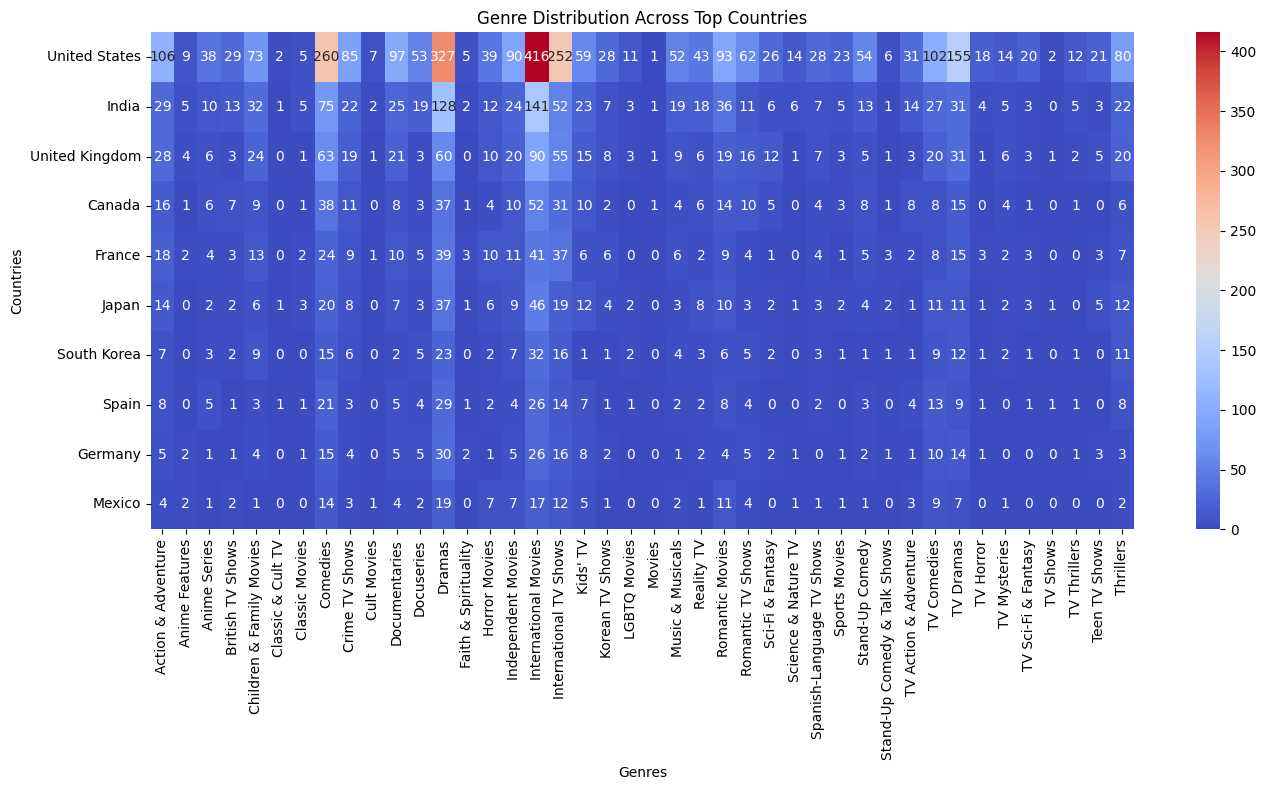

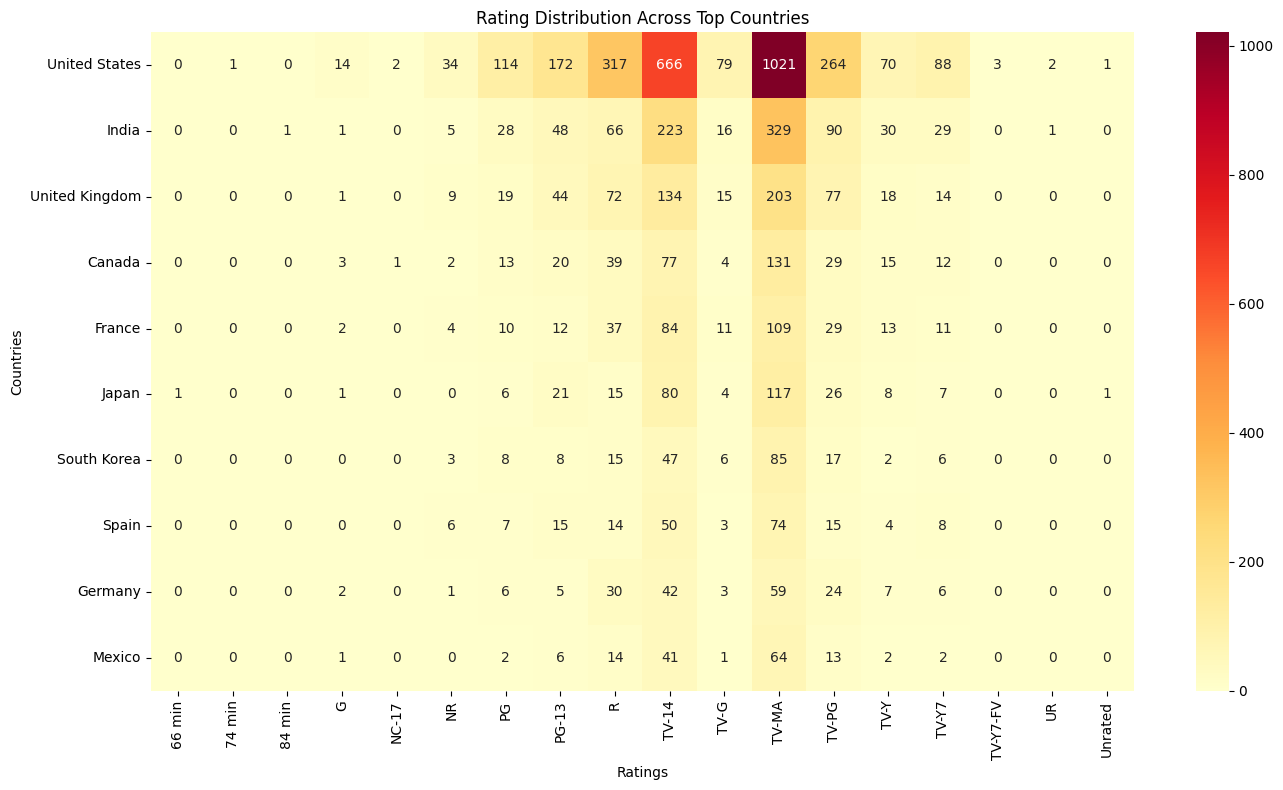

(rating
 TV-MA    2931
 TV-14    1930
 R         788
 TV-PG     773
 PG-13     482
 dtype: int64,
 genre
 International Movies      1188
 Dramas                     992
 Comedies                   699
 International TV Shows     639
 TV Dramas                  386
 dtype: int64)

In [23]:
# Recompute genre_by_country and rating_by_country to ensure proper definitions
import seaborn as sns
# Explode the 'country' and 'listed_in' columns for region and genre analysis
region_genre_data = data[data['country'] != 'Unknown'].copy()
region_genre_data['country'] = region_genre_data['country'].str.split(',').explode().str.strip().reset_index(drop=True)
region_genre_data['genre'] = region_genre_data['listed_in'].str.split(',').explode().str.strip().reset_index(drop=True)

# Aggregate data for genre distribution by country
genre_by_country = region_genre_data.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Aggregate data for rating distribution by country
rating_by_country = region_genre_data.groupby(['country', 'rating']).size().unstack(fill_value=0)

# Re-visualize genre distribution using a heatmap
# Re-visualize genre distribution using a heatmap with improved color scheme
plt.figure(figsize=(14, 8))
sns.heatmap(genre_by_country.loc[genre_by_country.sum(axis=1).nlargest(10).index],
            annot=True, cmap="coolwarm", cbar=True, fmt="d")
plt.title("Genre Distribution Across Top Countries")
plt.xlabel("Genres")
plt.ylabel("Countries")
plt.tight_layout()
plt.show()


# Re-visualize rating distribution using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(rating_by_country.loc[rating_by_country.sum(axis=1).nlargest(10).index], annot=True, cmap="YlOrRd", cbar=True, fmt='d')
plt.title("Rating Distribution Across Top Countries")
plt.xlabel("Ratings")
plt.ylabel("Countries")
plt.tight_layout()
plt.show()

# Suggest target audience based on dominant ratings and genre trends
dominant_ratings = rating_by_country.sum(axis=0).sort_values(ascending=False)
dominant_genres = genre_by_country.sum(axis=0).sort_values(ascending=False)

dominant_ratings.head(), dominant_genres.head()


**Duration Patterns**

1. *Analysis* on the distribution of duration in MOVIES

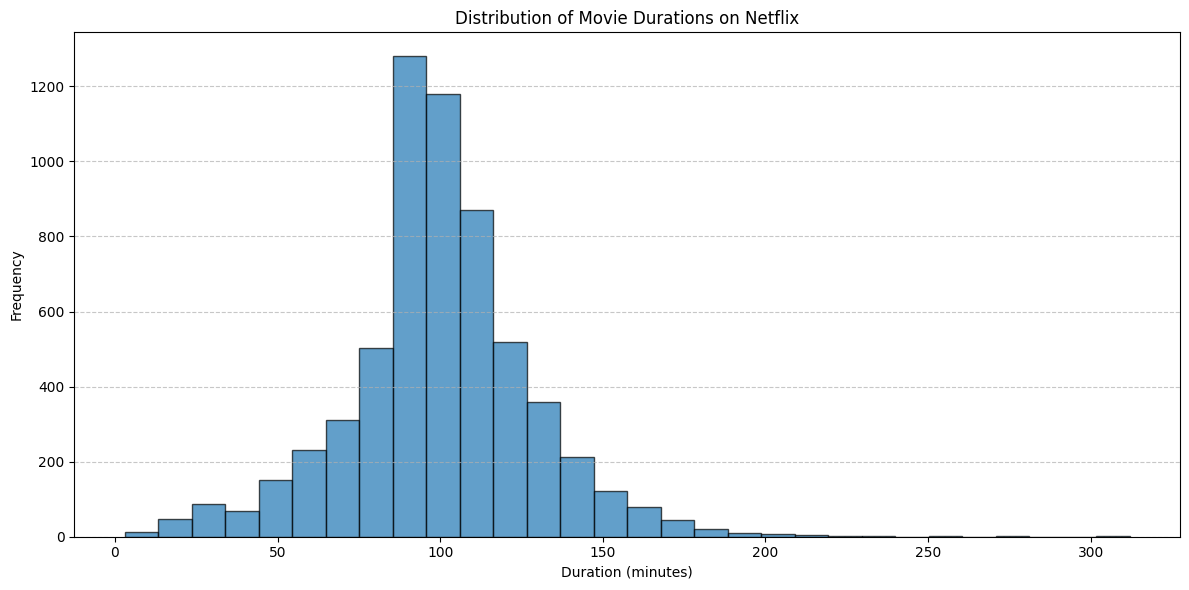

,duration_value
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


In [24]:
# Extract the numerical value and unit from the 'duration' column
data[['duration_value', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')

# Filter for movies only and extract the duration values in minutes
movies_data = data[data['type'] == 'Movie']
movies_duration = movies_data[movies_data['duration_value'].notnull()]

# Plot a histogram to visualize the distribution of movie durations
plt.figure(figsize=(12, 6))
plt.hist(movies_duration['duration_value'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate basic statistics for movie durations
duration_stats = movies_duration['duration_value'].describe()
duration_stats


2. Trends in no of seasons for TV Shows

<ipython-input-25-8188b0166e28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons_count'] = pd.to_numeric(tv_shows_data['duration_value'], errors='coerce')


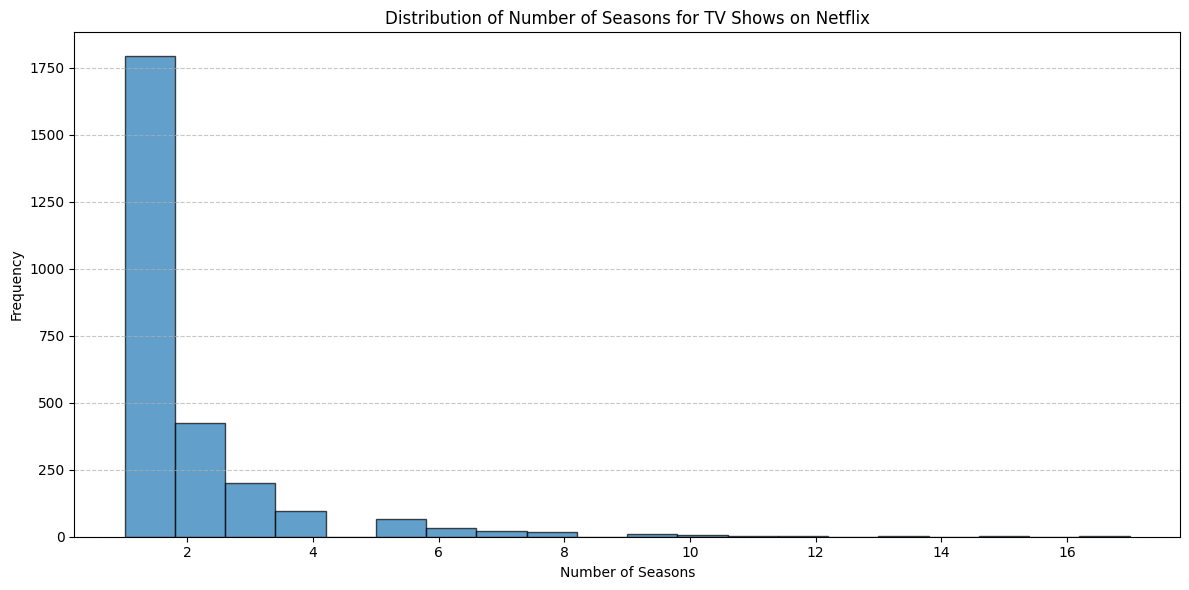

,seasons_count
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


In [25]:
# Filter for TV Shows and extract the number of seasons
tv_shows_data = data[data['type'] == 'TV Show']
tv_shows_data['seasons_count'] = pd.to_numeric(tv_shows_data['duration_value'], errors='coerce')

# Plot a histogram to visualize the distribution of the number of seasons
plt.figure(figsize=(12, 6))
plt.hist(tv_shows_data['seasons_count'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Seasons for TV Shows on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate basic statistics for the number of seasons
seasons_stats = tv_shows_data['seasons_count'].describe()
seasons_stats


**Rating Breakdown**

Frequency of different ratings

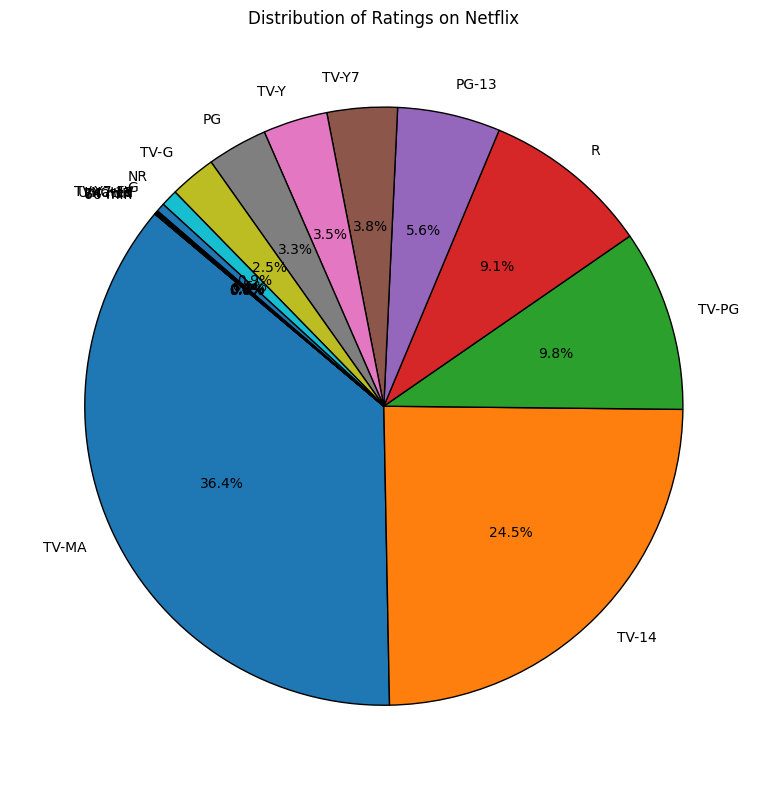

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [26]:
# Count the frequency of different ratings
ratings_frequency = data['rating'].value_counts()

# Plot a pie chart to visualize the distribution of ratings
plt.figure(figsize=(10, 8))
plt.pie(ratings_frequency, labels=ratings_frequency.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Ratings on Netflix')
plt.tight_layout()
plt.show()

# Display the numerical distribution of ratings for reference
ratings_frequency


ratings based on regions

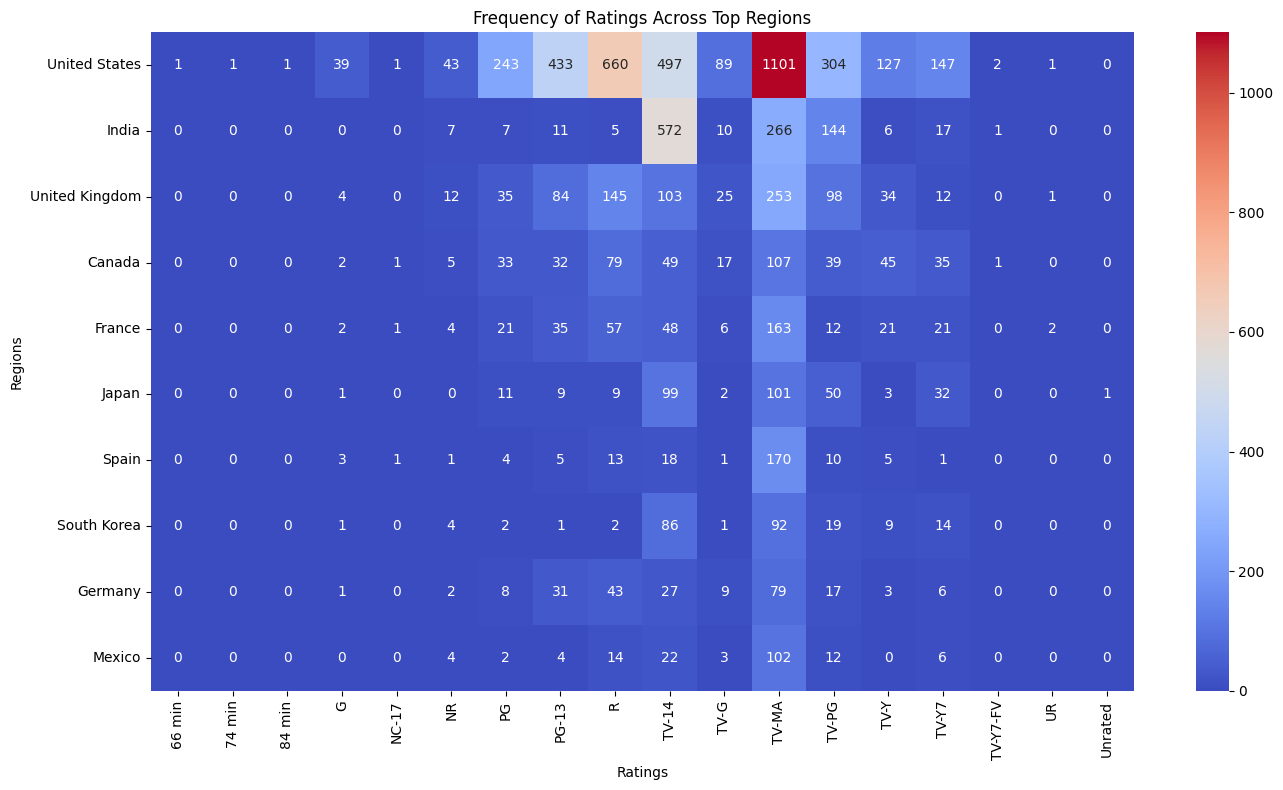

,0
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


In [27]:
# Create a fresh copy and ensure unique indexing for regions
region_ratings_data = data[data['country'] != 'Unknown'].copy()
region_ratings_data = region_ratings_data.reset_index(drop=True)

# Safely explode the country column to avoid duplication issues
region_ratings_exploded = region_ratings_data.assign(
    country=region_ratings_data['country'].str.split(',')
).explode('country')
region_ratings_exploded['country'] = region_ratings_exploded['country'].str.strip()

# Aggregate data for rating distribution by region
rating_by_region = region_ratings_exploded.groupby(['country', 'rating']).size().unstack(fill_value=0)

# Visualize the frequency of different ratings by region using a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(rating_by_region.loc[rating_by_region.sum(axis=1).nlargest(10).index], annot=True, cmap="coolwarm", fmt='d', cbar=True)
plt.title("Frequency of Ratings Across Top Regions")
plt.xlabel("Ratings")
plt.ylabel("Regions")
plt.tight_layout()
plt.show()

# Display the top regions with the highest frequency of ratings
rating_by_region.sum(axis=1).nlargest(10)


**Content Age**

Gap between the release year and date added to understand how recently produced content is being added.

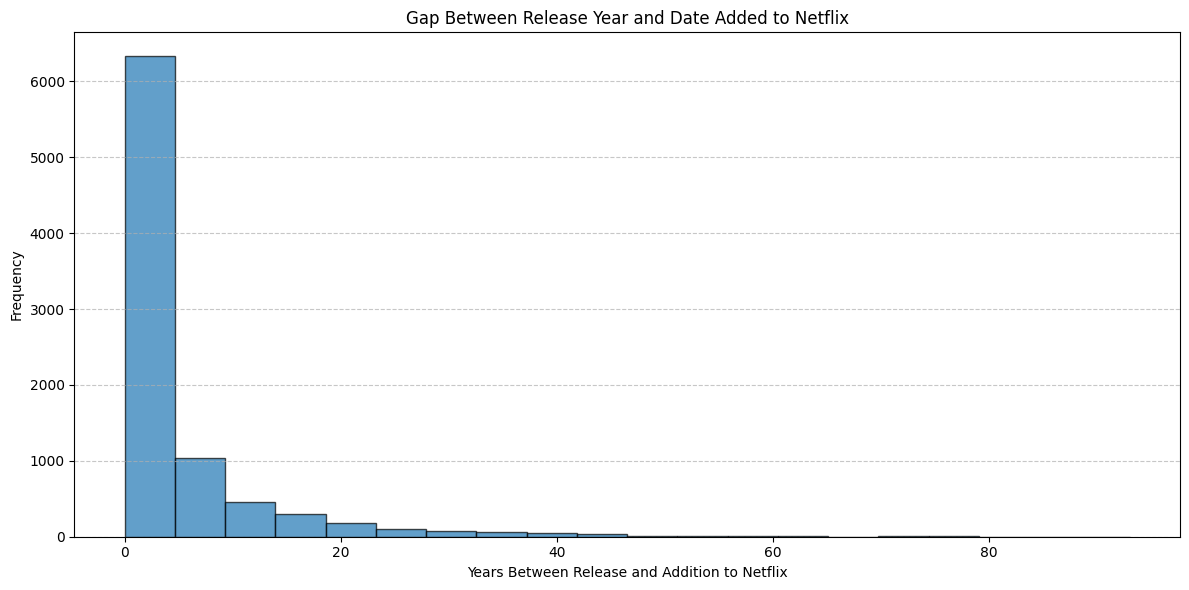

,release_to_add_gap
count,8695.000000
mean,4.700403
std,8.796060
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


In [29]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data['release_to_add_gap'] = data['year_added'] - data['release_year']

# Filter out invalid gaps (e.g., negative or missing values)
valid_gap_data = data[data['release_to_add_gap'] >= 0]

# Plot a histogram to visualize the gap distribution
plt.figure(figsize=(12, 6))
plt.hist(valid_gap_data['release_to_add_gap'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Gap Between Release Year and Date Added to Netflix')
plt.xlabel('Years Between Release and Addition to Netflix')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate statistics for the gaps
gap_stats = valid_gap_data['release_to_add_gap'].describe()
gap_stats

**Cast Popularity**

1. Most commonly appearing actors

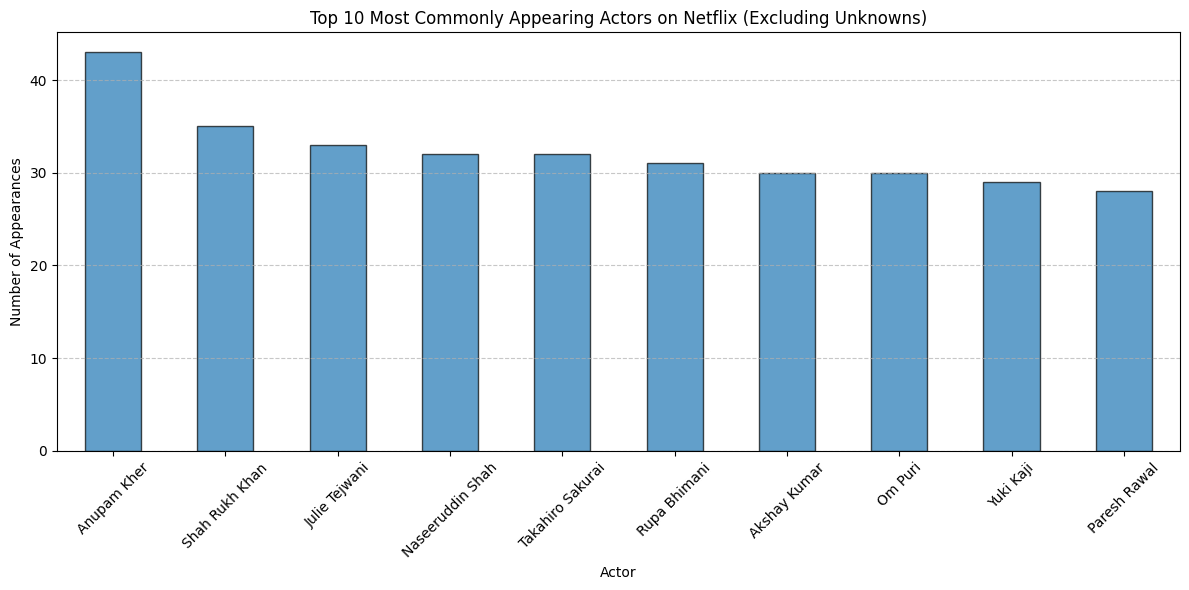

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29


In [33]:
# Remove 'Unknown' or NaN values from the 'cast' column and reprocess the data
actors_data_cleaned = data[data['cast'].notnull()]
actors_list_cleaned = actors_data_cleaned['cast'].str.split(',').explode().str.strip()
actor_counts_cleaned = actors_list_cleaned[actors_list_cleaned != 'Unknown'].value_counts()

# Plot the top 10 most commonly appearing actors excluding 'Unknown'
plt.figure(figsize=(12, 6))
actor_counts_cleaned.head(10).plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Top 10 Most Commonly Appearing Actors on Netflix (Excluding Unknowns)')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the top 10 most commonly appearing actors
actor_counts_cleaned.head(10)


2. Top actors by Genre

In [37]:
# Remove 'Unknown' values from the 'cast' column and safely process data
genre_actor_data_cleaned = data[data['cast'].notnull() & data['listed_in'].notnull()].copy()
genre_actor_data_cleaned = genre_actor_data_cleaned[~genre_actor_data_cleaned['cast'].str.contains('Unknown')].reset_index(drop=True)

# Safely explode the 'listed_in' and 'cast' columns
genre_actor_data_cleaned['genre'] = genre_actor_data_cleaned['listed_in'].str.split(',').explode().str.strip().reset_index(drop=True)
genre_actor_data_cleaned['cast'] = genre_actor_data_cleaned['cast'].str.split(',').explode().str.strip().reset_index(drop=True)

# Identify the top actor for each genre
top_actors_by_genre_cleaned = genre_actor_data_cleaned.groupby('genre')['cast'].value_counts().groupby(level=0).head(1).reset_index(name='Count')

# Display the top actor for each genre excluding 'Unknown'
top_actors_by_genre_cleaned


,genre,cast,Count
0,Action & Adventure,Gillian Jacobs,2
1,Anime Features,Addison Timlin,1
2,Anime Series,Wataru Takagi,2
3,British TV Shows,Adam Sandler,1
4,Children & Family Movies,Rajesh Kava,3
5,Classic & Cult TV,Christopher Guest,1
6,Classic Movies,Brendan Gleeson,2
7,Comedies,Kristen Stewart,3
8,Crime TV Shows,London Hughes,2
9,Cult Movies,Aashish Chaudhary,1


3. Co-Starring Trends



In [39]:
from itertools import combinations
from collections import Counter

# Filter for valid 'cast' entries
co_star_data = data[data['cast'].notnull() & ~data['cast'].str.contains('Unknown')]

# Generate co-star pairs
co_star_pairs = co_star_data['cast'].str.split(',').apply(lambda x: list(combinations([actor.strip() for actor in x], 2)))
co_star_flattened = [pair for sublist in co_star_pairs.dropna() for pair in sublist]

# Count frequent co-star pairs
co_star_counts = Counter(co_star_flattened).most_common(10)

# Display top 10 co-star pairs
co_star_counts


[(('Julie Tejwani', 'Rupa Bhimani'), 24),
 (('Julie Tejwani', 'Rajesh Kava'), 23),
 (('Rupa Bhimani', 'Rajesh Kava'), 22),
 (('Julie Tejwani', 'Jigna Bhardwaj'), 20),
 (('Jigna Bhardwaj', 'Rajesh Kava'), 20),
 (('Rupa Bhimani', 'Jigna Bhardwaj'), 19),
 (('Vatsal Dubey', 'Julie Tejwani'), 18),
 (('Vatsal Dubey', 'Rupa Bhimani'), 18),
 (('Vatsal Dubey', 'Jigna Bhardwaj'), 18),
 (('Vatsal Dubey', 'Rajesh Kava'), 17)]

***Content Addition ***

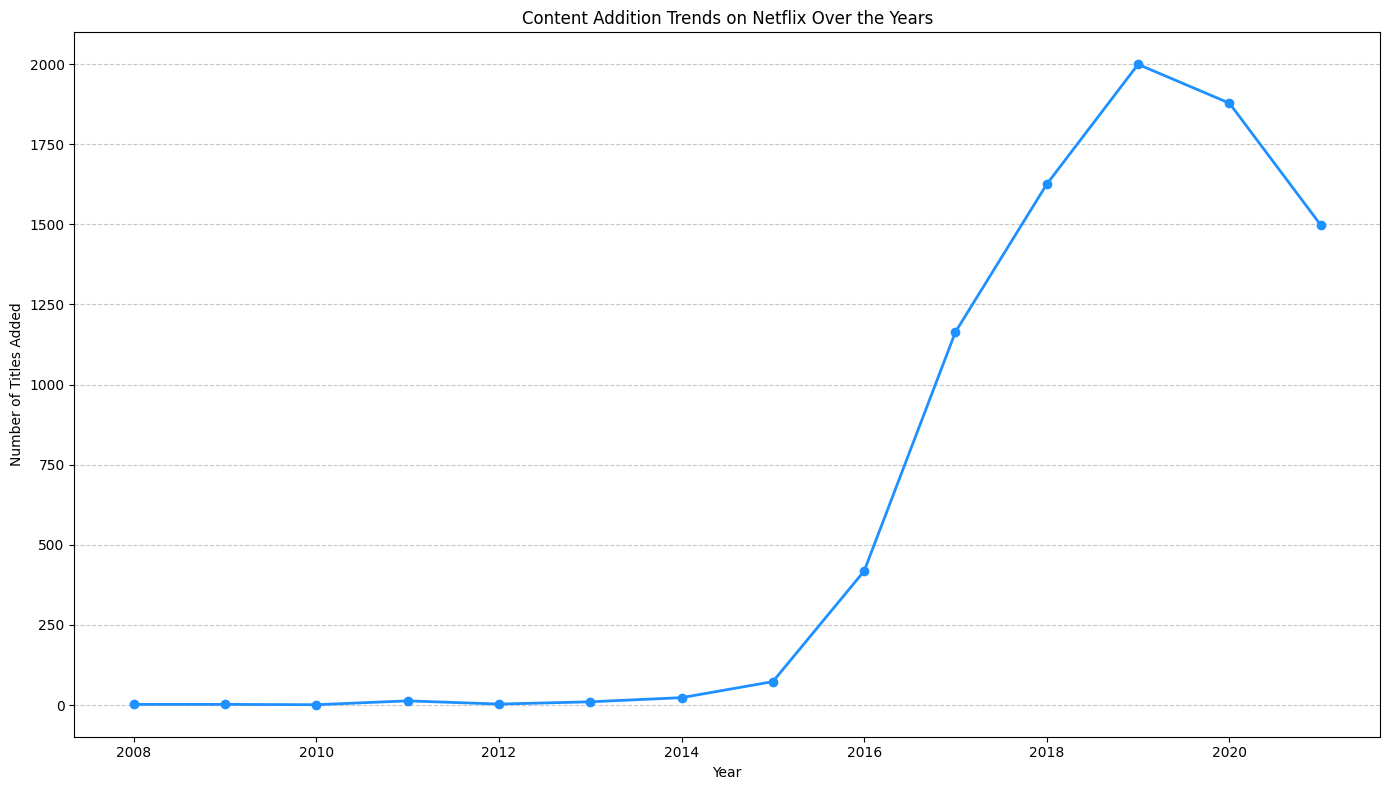

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,418


In [47]:
# Extract the year from the 'date_added' column
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year

# Count the number of additions per year
content_addition_trends = data['year_added'].value_counts().sort_index()

# Plot the trend of content additions over the years
plt.figure(figsize=(14, 8))
plt.plot(content_addition_trends.index, content_addition_trends.values, marker='o', linestyle='-', linewidth=2, color='dodgerblue')
plt.title('Content Addition Trends on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the numerical data for reference
content_addition_trends


USER RECOMMENDATION SYSTEM USING COLLABORATIVE FILTERING

1. Prepare the User-Item Interaction Matrix

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Simulate user-item interactions (e.g., generate random data)
import numpy as np

# Assume 100 users and 500 randomly selected titles
users = [f"User_{i}" for i in range(1, 101)]
items = data['title'].sample(500, random_state=42).tolist()
interaction_matrix = pd.DataFrame(
    np.random.randint(0, 2, size=(len(users), len(items))),
    index=users,
    columns=items
)

# Convert to sparse matrix for computational efficiency
interaction_sparse = csr_matrix(interaction_matrix.values)


2. User-User Collaborative Filtering


In [49]:
# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(interaction_sparse)

# Create a DataFrame for user similarity
user_similarity_df = pd.DataFrame(user_similarity, index=users, columns=users)

# Recommend items based on similar users
def recommend_user_based(user, interaction_matrix, user_similarity_df, num_recommendations=5):
    similar_users = user_similarity_df[user].sort_values(ascending=False).iloc[1:6].index
    user_items = interaction_matrix.loc[user]
    recommendations = interaction_matrix.loc[similar_users].sum(axis=0).sort_values(ascending=False)
    recommended_items = recommendations[~user_items.astype(bool)].head(num_recommendations)
    return recommended_items.index.tolist()

# Example recommendation for a user
recommend_user_based("User_1", interaction_matrix, user_similarity_df)


["Masha's Spooky Stories",
 'ReMastered: Who Killed Jam Master Jay?',
 'Chelsea',
 'Gun City',
 'Kung Fu Panda: Secrets of the Scroll']

3. Item-Item Collaborative Filtering



In [50]:
# Calculate item similarity using cosine similarity
item_similarity = cosine_similarity(interaction_sparse.T)

# Create a DataFrame for item similarity
item_similarity_df = pd.DataFrame(item_similarity, index=items, columns=items)

# Recommend items based on similar items
def recommend_item_based(item, interaction_matrix, item_similarity_df, num_recommendations=5):
    similar_items = item_similarity_df[item].sort_values(ascending=False).iloc[1:6].index
    return similar_items.tolist()

# Example recommendation for an item
recommend_item_based(items[0], interaction_matrix, item_similarity_df)


['Private Lives',
 'Zodiac',
 'El club de los buenos infieles',
 'We Are the Champions',
 'Reggie Yates Outside Man']